In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import string
from matplotlib.ticker import FuncFormatter

pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

In [191]:
df = pd.read_csv('lego_out.csv')
df.year = df.year.fillna(0).astype(int)

In [192]:
df.columns

Index(['inventory_id', 'part_num', 'color_id', 'quantity', 'is_spare',
       'color_name', 'color_rgb', 'color_istrans', 'part_name', 'part_cat_id',
       'ivty_version', 'set_num', 'set_quantity', 'set_name', 'year',
       'theme_id', 'set_parts_count', 'theme_name', 'theme_parent_id',
       'parent_name', 'part_cat_name'],
      dtype='object')

In [80]:
def get_theme_quantity(df):
    """This function takes a dataframe that contains a variable named quantity.
    It outputs a Series containing the top theme by sum of quantity."""
    
    return df.groupby('parent_name')['quantity'].sum().sort_values(ascending=False).head(1)

### Which themes were top-sellers per year?

In [127]:
# Group lego dataset by parent_name and determine how many units of inventory there were (as proxy for units sold)
top_runner = df[df.year > int(1968)].groupby('year').apply(get_theme_quantity)
top_runner
# Plot graph of top theme by year
#annual_qty.plot()

year  parent_name           
1969  Train                      1796
1970  Legoland                   1231
1971  Legoland                   1502
1972  Educational and Dacta      1152
1973  Legoland                   2105
1974  Universal Building Set     1216
1975  Legoland                   1862
1976  Legoland                   3448
1977  Universal Building Set     3295
1978  Classic Town               3267
1979  Space                      2557
1980  Train                      3496
1981  Universal Building Set     1755
1982  Universal Building Set     1364
1983  Train                      2046
1984  Classic Town               1750
1985  Universal Building Set     5241
1986  Classic Town               2722
1987  Universal Building Set     4129
1988  Space                      2792
1989  Classic Town               2526
1990  Universal Building Set     6251
1991  Classic Town               4000
1992  Universal Building Set     2434
1993  Classic Town               3139
1994  Classic Town   

### Which Lego theme is best-selling of all time?

Star Wars is the best-selling theme of all time, with 132,552 units made and taking up 7% of all units ever made by Lego.
Even though it is a recent arrival since 2009, it has overtaken themes such as Model (since 1983) and Creator (since 2001).


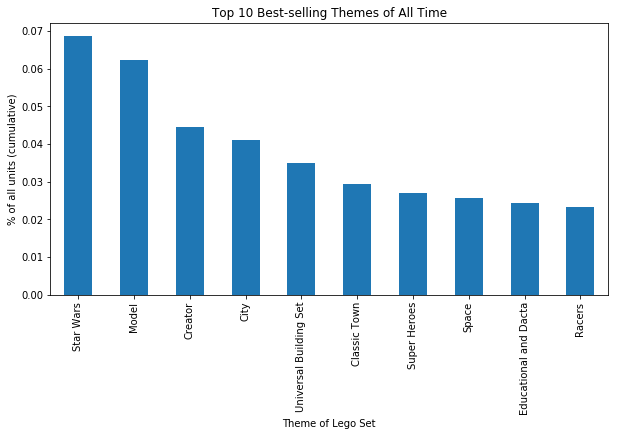

In [266]:
goat = df.groupby('parent_name')['quantity'].sum().sort_values(ascending=False).head(10)
themes = list(goat.index)[:10]
quantity_sold = df.quantity.sum()

cum_quantity = pd.DataFrame(list(zip(themes, goat/quantity_sold)), columns=['theme', 'percent_qty'])
cum_quantity.plot(x='theme', y='percent_qty', kind='bar', legend=False, figsize=(10,5))
plt.title("Top 10 Best-selling Themes of All Time")
plt.xlabel("Theme of Lego Set")
plt.ylabel("% of all units (cumulative)")
plt.savefig('top10.png')

### Which themes coincide with high revenue growth in that year?

In [204]:
fin = pd.read_csv('lego_fin.csv')

# Create new columns measuring yearly changes in revenue and change in operating_profit
# Define a function to iterate over rows of dataframe in order to calculate annual change
def year_over_year(df, col):
    change = []
    years = df.year
    for i in range(df.shape[0]-1):
        change.append((df[col][i] / df[col][i+1]) - 1)
    change.append(0)
    return pd.DataFrame(list(zip(years, change)), columns=['year', col+"_growth"])

fin['profit_growth'] = year_over_year(fin, 'operating_profit')["operating_profit_growth"]
fin['revenue_growth'] = year_over_year(fin, 'revenue')["revenue_growth"]

#sort fin dataframe in ascending years
fin = fin.sort_values(by=['year'], ascending=True)

Text(0,0.5,'USD$K')

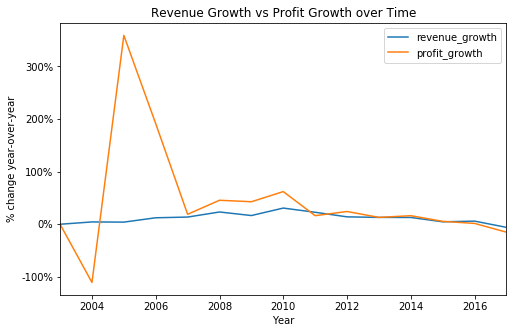

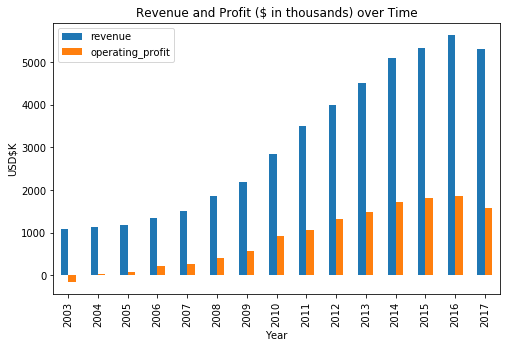

In [259]:
# How does revenue growth rate affect profit growth rate?

ax1 = fin.plot(x="year", y=['revenue_growth', 'profit_growth'], kind="line", figsize=(8,5))
plt.title("Revenue Growth vs Profit Growth over Time")
plt.xlabel("Year")
plt.ylabel("% change year-over-year")
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
#plt.savefig('revenue_growth.png') 

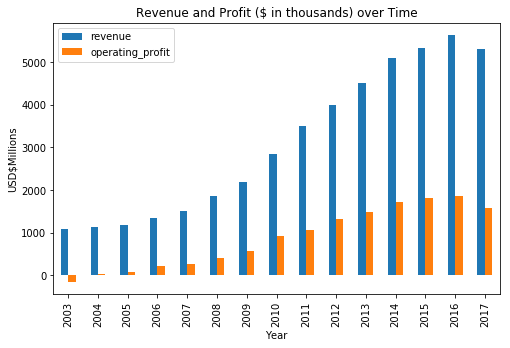

In [261]:
fin.plot(x="year", y=["revenue", "operating_profit"], kind="bar", figsize=(8,5))
plt.title("Revenue and Profit ($ in thousands) over Time")
plt.xlabel("Year")
plt.ylabel("USD$Millions")
#plt.savefig('pnl.png')

In [236]:
tops = df[df.year > int(2002)].groupby('year').apply(get_theme_quantity)
top_years = list(range(2003, 2018))
top_themes = []
for i in range(15):
    top_themes.append(tops.index.values[i][1])

themes_fin = pd.DataFrame(list(zip(top_years, top_themes, top_runner)), columns=['year', 'parent_name', 'quantity'])
themes_fin

,year,parent_name,quantity
0,2003,Sculptures,1796
1,2004,Creator,1231
2,2005,Creator,1502
3,2006,Creator,1152
4,2007,Model,2105
5,2008,Model,1216
6,2009,Star Wars,1862
7,2010,Star Wars,3448
8,2011,Star Wars,3295
9,2012,Star Wars,3267


In [256]:
rd = pd.merge(fin, themes_fin, left_on = 'year', right_on = 'year')

In [271]:
rd[['year', 'parent_name', 'revenue', 'revenue_growth']]

,year,parent_name,revenue,revenue_growth
0,2003,Sculptures,1094,0.00
1,2004,Creator,1142,0.04
2,2005,Creator,1188,0.04
3,2006,Creator,1334,0.12
4,2007,Model,1516,0.14
5,2008,Model,1869,0.23
6,2009,Star Wars,2178,0.17
7,2010,Star Wars,2847,0.31
8,2011,Star Wars,3495,0.23
9,2012,Star Wars,3986,0.14


In [276]:
fin.columns

Index(['year', 'revenue', 'production_cost', 'gross_profit', 'gross_profit%',
       'expenses_sales', 'expenses_admin', 'expenses_other', 'expenses_total',
       'expenses%', 'operating_profit', 'special_items', 'financial_income',
       'financial_expenses', 'profit_before_tax', 'profit_before_tax%', 'tax',
       'tax_rate%', 'total_assets', 'equity', 'liabilities',
       'operating_cash_flow', 'employees', 'sales_growth_yoy%',
       'operating_margin%', 'sales_per_emp', 'fx_usd_to_dkk', 'profit_growth',
       'revenue_growth'],
      dtype='object')

In [283]:
fin['operating_margin%'].mean()

0.23519999999999996

In [289]:
fin['expenses%'].mean()

0.45640000000000003